## EE 461P: Data Science Principles  
### Homework 4 
### Total points: 90
### Due:  submitted via Canvas by March 30 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Reece Riherd, rdr2793
2. Blake Schwartz, bps826

### Homework group No.:50 

## Q1. Bayes Optimal Classifier (15 points)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

Hint : Think and work out the bayes classifier as studied in slides aml-classification1.pdf.

Answer:

$$
\begin{align*}
&\alpha_1 = Choose \space C_1 \\
&\alpha_2 = Choose \space C_2 \\
&\alpha_r = Reject \\
% &\begin{split}
R(\alpha_1|x) & = 0*(P(C_1|x))+3*(P(C_2|x)) \\
& = 3*(1-P(C_1|x)) 
% &\end{split} \\
&R(\alpha_2|x)=2*(P(C_1|x)) \\
&R(\alpha_r|x) = c \\
&\text{Choose C1 if:} \\
&R(\alpha_1|x) < c) => P(C_1|x)< \frac{c}{2} \\
&\text{Otherwise, reject C1 and C2} \\\\
&\text{1) if c = 0:} \\
&\text{Choose C1 if P(C1|x) > 1 -> impossible} \\
&\text{Choose C1 if P(C1|x) < 0 -> impossible} \\
&\text{Therefore, always reject both C1 and C2} \\\\
&\text{2) if c = 2:}\\
&\text{Choose C1 if P(C1|x) > } \frac{1}{3} \\
&\text{Choose C2 if P(C1|x) < 1} \\
&\text{Now, we must compare C1 to C2:} \\
&\text{When is } R(\alpha_1|x) < R(\alpha_2|x)? \\
% &\begin{split}
3-3*(P(C_1|x)<2*(P(C_1|x)) \\
3 < 5*(P(C_1|x)) \\
P(C_1|x) > \frac{3}{5}
% &\end{split} \\ 
&\text{Therefore, choose C1 if } P(C_1|x)>\frac{3}{5} \\
&\text{Else, choose C2} \\\\
&\text{3) if c = 1:} \\
&\text{Choose C1 if } P(C_1|x) > \frac{2}{3} \\
&\text{Choose C2 if } P(C_1|x) < \frac{1}{2} \\
&\text{Else, reject both C1 and C2}
\end{align*}
$$

## Q2. PCA (25 points)

MNIST is a dataset consisting images of digits (0-9). Load the dataset from `mnist.csv`. Then standardise the datasets using StandardScaler from `sklearn.preprocessing` library.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [3]:
dataset = pd.read_csv('mnist.csv')

In [4]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset)

2.1 Now, do PCA and get 2 principal components of the data by performing following steps (10 points):
  

*   Create a covariance matrix of the scaled data
*   Obtain the two eigen vectors of the covariance matrix corresponding to the highest two eigen values
*   Project the scaled data onto these eigen vectors to obtain a 2-dimesnional representation of the instances in the data





In [1]:
class PCA():
  def __init__(self, num_components):
    self.num_components = num_components
    self.eigen_values = None
    self.eigen_vectors = None
    self.projection_matrix = None
    self.sorted_eigen_values = None
    self.explained_variance = None
    self.explained_variance_ratio = None

  # def fit(self, X, k):
  def fit(self, X):
    ## code for getting the eigen vectors from the data
    cov_matrix = np.cov(X.T)
    self.eigen_values,self.eigen_vectors = np.linalg.eig(cov_matrix)
    self.get_principal_components()
    # self.explained_variance = self.eigen_values[self.sorted_eigen_values]
    # self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()
    return (self.eigen_values, self.eigen_vectors)

  # def get_principal_components(self, k):
  def get_principal_components(self):
    ## code for obtaining eigen vectors corresponding to the top-k eigen values
    self.sorted_eigen_values = np.argsort(self.eigen_values)[::-1]
    self.eigen_vectors = self.eigen_vectors[:,self.sorted_eigen_values]
    self.eigen_values = self.eigen_values[self.sorted_eigen_values]
    self.projection_matrix = self.eigen_vectors[:,:self.num_components]

  # def transform(self, data, k):
  def transform(self, data):
    ## code for getting projections on the determined principal components
    return np.dot(data, self.projection_matrix)
    

In [9]:
instance = PCA(num_components=2)
data_evals, data_evecs = instance.fit(scaled_dataset)
projection = instance.transform(scaled_dataset)

In [10]:
print(projection.shape)

(42000, 2)


2.2 Select the points from the train dataset corresponding to class 0 and 7 and plot their 2-D projections as obtained in the previous step (5 points). 




In [48]:
print(dataset.iloc[0])

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64


In [43]:
class_zero_seven = pd.DataFrame().append([dataset.iloc[i] for i in range(0,len(dataset)) if dataset.iloc[i]['label'] == 0 or dataset.iloc[i]['label'] == 7])
scaler_zero_seven = StandardScaler()
scaled_zero_seven = scaler_zero_seven.fit_transform(class_zero_seven)

C:\Users\reece\AppData\Local\Temp\ipykernel_39524\1362804806.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_zero_seven = pd.DataFrame().append([dataset.iloc[i] for i in range(0,len(dataset)) if dataset.iloc[i]['label'] == 0 or dataset.iloc[i]['label'] == 7])


In [46]:
instance = PCA(num_components=2)
data_evals, data_evecs = instance.fit(scaled_zero_seven)
projection = instance.transform(scaled_zero_seven)

c:\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


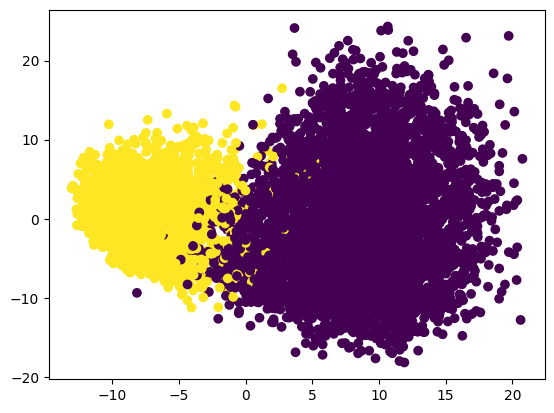

In [50]:
plt.figure()
y = class_zero_seven['label'].values
plt.scatter(projection[:,0],projection[:,1],c=y)

2.3 Now partition the dataset into a train and test dataset by doing a 75/25 split. Learn the principal components on the train dataset (after scaling) for number of components in [2, 10, 100]. Use the learnt principal components to obtain projections for both train and test dataset (total 3 train/test pairs, 2-D, 10-D and 100-D). Train one LogisticRegression(random_state=4,max_iter=10000) model for each of the reduced dimesnional space (2-D, 10-D and 100-D). Print the classification reports on test dataset for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). (10 points)

In [ ]:
from sklearn.model_selection import train_test_split
Y = dataset['label']
X = dataset.drop(['label'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)

scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)

## Answer:

# Q3 Feature Selection (25 points)

1. Explain in your own words what forward and backward feature selection methods are, and their pros and cons. (5 points)
2. Use the [feature selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) module from sklearn to select features using Decision Trees on the first 20 features of the [breast_cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Do forward and backward feature selection and print what features are being selected. Use `n_features='auto'` and see how many features are being selected. (15 points)
4. Briefly explain the results you have obtained. (5 points)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data[:, :20] # Use the first 20 features
y = data.target
feature_names = data.feature_names[:20]

# Answer:

## Q4. Classification using Decision Trees and MLP (25 points)

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

1. Load the dataset provided in [`spambase.data`](https://drive.google.com/file/d/1Vl2HOc9UAxJuwXabUmOJc8sQv8F57QfB/view?usp=sharing) and use scikit-learn to create a train-test split as shown.
2. Train a decision tree model on the training dataset and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [ROC-AUC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) on the test set. (10 points) 
3. Train an [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) with the default parameters and report the confusion matrix and ROC-AUC curve on the test set. (10 points)
4. Note your observations on the performance of the 2 models. (5 points)   


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics

data = pd.read_csv('spambase.data')

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['label']), 
                                                    data[['label']], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Answer: